# Student Number Surname & Initials
# 22324025 Nofemele L

## Exam Theme: The Two-Pot Retirement System in South Africa



### Problem  Goal

- Classification(Predict Withdrawals): is to build a machine learning model whether an employee will withdraw from the Accessble Poty with the 12 moths.
- Forecating (Locked Pot Growth): using time-series to model the growth of the retirement savings in the locked pot over time.

  These predictions will help financial institutions and governemt better understand employee behavior and plan accordingly for long-term financial security.

#### Dataset choices

**1. Classification:** The Bank_customer_retirement dataset I chose it beacuse it includes the age of pupils that are have savings for their retirement which are similar to the factors influencing withdrawals in the Accessible Pot.
https://www.kaggle.com/code/rongxinwang/retirement-eligibility-classification/input

**2. Forecating** The Yahoo_stock dataset has external factors like market trends and inflation, which are crucial for predicting locked pot growth.
https://www.kaggle.com/code/georgesaavedra/time-series-forecasting/input

#### Importing all necessary libraries

In [174]:
# Data manipulation and analysis
import pandas as pd # for loading and manipulation datasets
import numpy as np # for numerical operations

# Data visualization
import seaborn as sns # For creating stastic, publication-quality plots
import matplotlib.pyplot as plt # for advanced data visualization 

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Forecasting 
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose

# a) Classification

### Data Pre Processing

In [137]:
# Loading the dataset
df_class = pd.read_csv(r'C:\Users\Luzuko\22324025_Nofemele_L_Final_Exam_TP2\Bank_Customer_retirement.csv')
df_prophet = pd.read_csv(r'C:\Users\Luzuko\22324025_Nofemele_L_Final_Exam_TP2\yahoo_stock.csv')

In [138]:
# Inspecting the first few rows
df_class.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [139]:
# Inspecting the last few colwms of the dataset
df_class.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


In [140]:
# Inspecting the number of duplicates
df_duplicates = df_class.duplicated().sum()
print(f"Number of duplicates: {df_duplicates}")

Number of duplicates: 0


In [141]:
# Inspecting the column names
df_columns  = df_class.columns
print(f"Column names:\n\n{df_columns}")

Column names:

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')


In [142]:
# Inspectiong the datatypes
df_datatypes = df_class.dtypes
print(f"Data types for each column:\n\n{df_datatypes}")

Data types for each column:

Customer ID       int64
Age             float64
401K Savings    float64
Retire            int64
dtype: object


In [143]:
# Inspencting rows and columns
df_shape = df_class.shape
print(f"Number of rows and columns:\n\n {df_shape}")

Number of rows and columns:

 (500, 4)


In our dataset we have 500 rows and 4 columns

In [144]:
# Inspecting the summary of the dataset
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer ID   500 non-null    int64  
 1   Age           500 non-null    float64
 2   401K Savings  500 non-null    float64
 3   Retire        500 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


In [145]:
# Inspecting the descriptive statistics
df_class.describe()

,Customer ID,Age,401K Savings,Retire
count,500.000000,500.000000,500.000000,500.000000
mean,249.500000,46.757077,534984.465804,0.500000
std,144.481833,7.790125,187675.818881,0.500501
min,0.000000,25.000000,10.000000,0.000000
25%,124.750000,41.299451,382626.524425,0.000000
50%,249.500000,46.695770,534512.984350,0.500000
75%,374.250000,52.322551,680670.257025,1.000000
max,499.000000,70.000000,1000000.000000,1.000000


In [146]:
# Inspecting the number of missing values
df_missing_values = df_class.isnull().sum()
print(f"Number of missing values:\n\n{df_missing_values}")

Number of missing values:

Customer ID     0
Age             0
401K Savings    0
Retire          0
dtype: int64


All records or rows have values, the is no need to remove or fill any record with missing values

In [147]:
# Changeing the values in the 'Retire' Columns
df_class['Retire'] = df_class['Retire'].replace({1: 'Retired', 0: 'Not Retired'})
print(df_class['Retire'].value_counts()) #Displaying the updated column

Retire
Not Retired    250
Retired        250
Name: count, dtype: int64


In [148]:
# Changing column name from '401K Savings' to 'Savings'
#df_class.rename(columns={'401K Savings': 'Savings'}, inplace=True)
#df_class.head()

df_class.rename(columns={'Savings': '401K Savings'}, inplace=True)
df_class.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,Not Retired
1,1,56.101686,768671.5740,Retired
2,2,57.023043,821505.4718,Retired
3,3,43.711358,494187.4850,Not Retired
4,4,54.728823,691435.7723,Retired


## Exploratory data Analysis

C:\Users\Luzuko\AppData\Local\Temp\ipykernel_23092\2623328660.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=retire, data=df_class, palette='viridis')


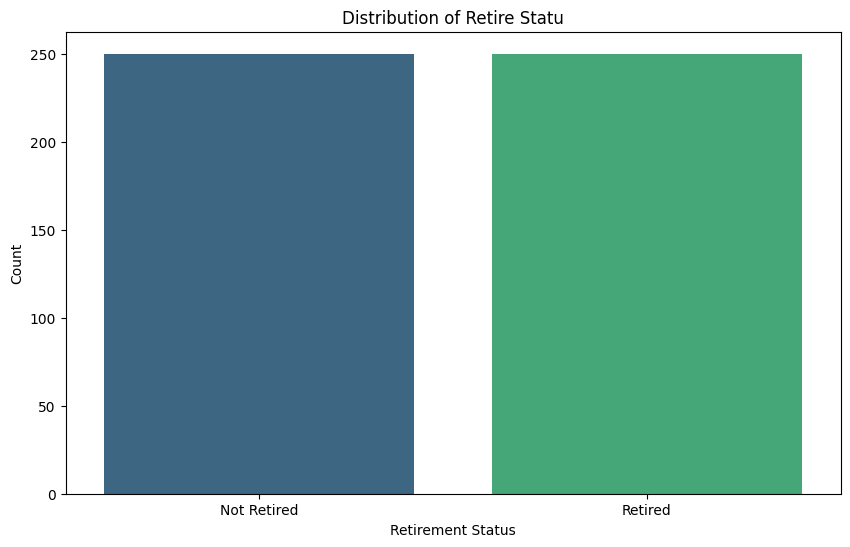

In [149]:
# Visualizing the distribution of the 'Retire'
retire = df_class['Retire']
plt.figure(figsize=(10,6))
sns.countplot(x=retire, data=df_class, palette='viridis')
plt.title('Distribution of Retire Statu')
plt.xlabel('Retirement Status')
plt.ylabel('Count')
plt.show()

There are a number of 250 customers that have not retired and also a 250 customers that have retired

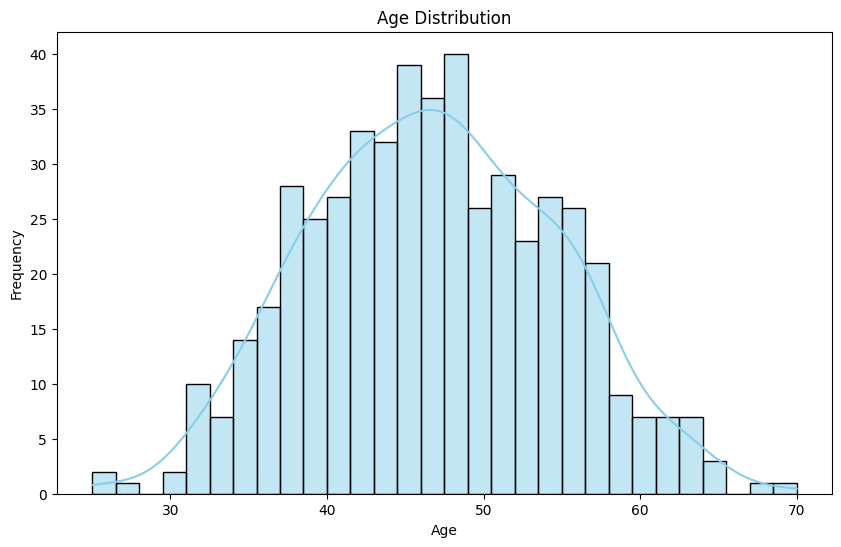

In [150]:
# Visualizing the distribution of Age
Age = df_class['Age']
plt.figure(figsize=(10,6))
sns.histplot(Age, bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\Luzuko\AppData\Local\Temp\ipykernel_23092\337576823.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=retire, y=Age, data=df_class, palette='viridis')


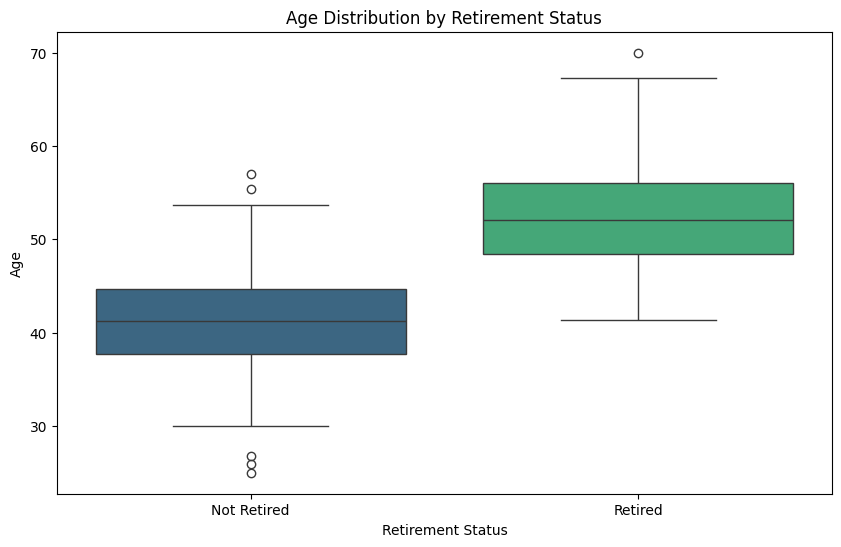

In [151]:
# Exploring the relationship between Age and Retirement Satus
plt.figure(figsize=(10,6))
sns.boxplot(x=retire, y=Age, data=df_class, palette='viridis')
plt.title('Age Distribution by Retirement Status')
plt.xlabel('Retirement Status')
plt.ylabel('Age')
plt.show()

C:\Users\Luzuko\AppData\Local\Temp\ipykernel_23092\2326861011.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=retire, y=savings, data=df_class, palette='viridis')


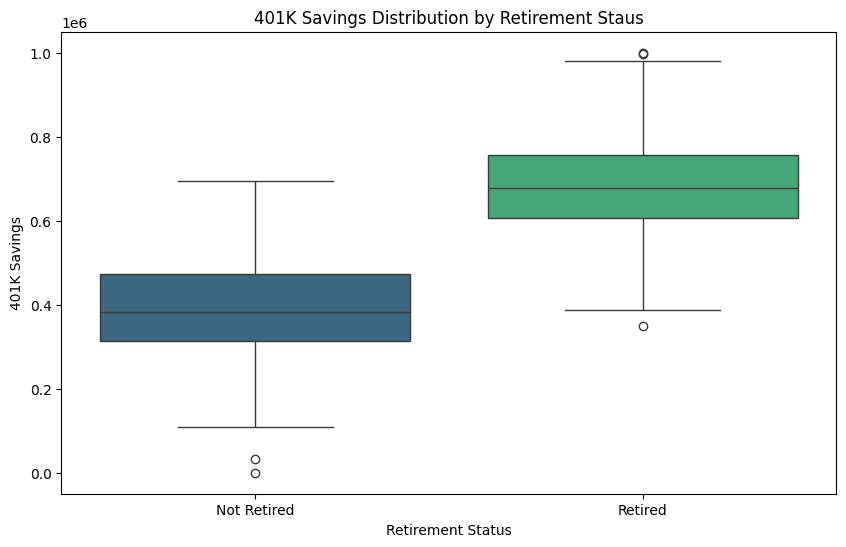

In [152]:
# Exploring the relationship between 
savings = df_class['401K Savings']
plt.figure(figsize=(10,6))
sns.boxplot(x=retire, y=savings, data=df_class, palette='viridis')
plt.title('401K Savings Distribution by Retirement Staus')
plt.xlabel('Retirement Status')
plt.ylabel('401K Savings')
plt.show()

### Modeling


a. Encoding the target Variable

In [153]:
# Creating an instance of LabelEncoder
Label_encoder = LabelEncoder()

# Encoding the 'Retire' column
df_class['Retire'] = Label_encoder.fit_transform(df_class['Retire'])
print(df_class['Retire'].unique())

[0 1]


b. Splitting the data into Features and Targets

In [154]:
# Feature (X) and target (y)
X = df_class.drop(columns=['Retire']) #Feature (age, 401K Savings)
y = df_class['Retire'] # Target variable (Rirement status)

# Displaying the shapes of X and y
print(f"Features shape: {X.shape}, Target shape: {y.shape}")

Features shape: (500, 3), Target shape: (500,)


In [155]:
# Splitting the datset int training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_shape = X_train.shape
test_shape = X_test.shape

# Displaying the shapes of thr training and testing sets
print(f"Training set shape: {train_shape}\n\nTest set shape: {test_shape}")

Training set shape: (400, 3)

Test set shape: (100, 3)


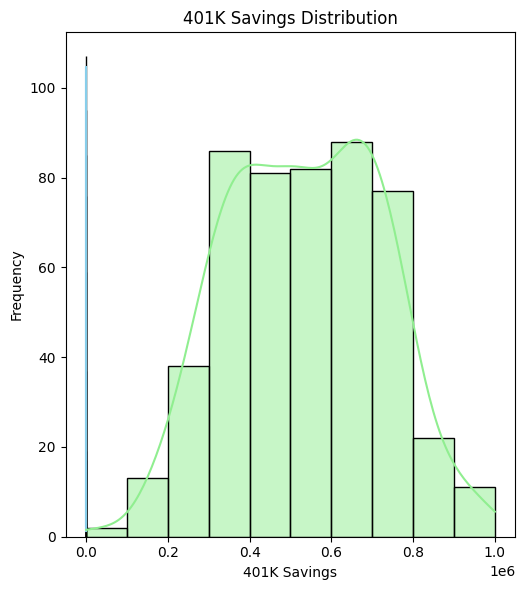

In [156]:
# Plot age distribution 
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
sns.histplot(df_class['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

#Plot savings distribution
plt.subplot(1, 2, 1)
sns.histplot(df_class['401K Savings'], bins=10, kde=True, color='lightgreen')
plt.title('401K Savings Distribution')
plt.xlabel('401K Savings')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

d. Scaling the Features

In [157]:
# Creating an instance of StandardScaler
scaler = StandardScaler()

# Fitting and transforming the training data, transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dsiplaying the first few rows of the scaled features
print(X_train_scaled[:5])

[[ 6.92641387e-03  1.49477171e-03  6.56278094e-01]
 [ 1.31742529e+00  6.13798394e-01  1.20602543e+00]
 [-1.63119718e+00  3.03472362e-01  7.26703677e-01]
 [ 5.26852596e-01 -2.66339547e+00 -1.19810968e+00]
 [ 5.98075361e-01  1.32076803e+00  1.36744697e+00]]


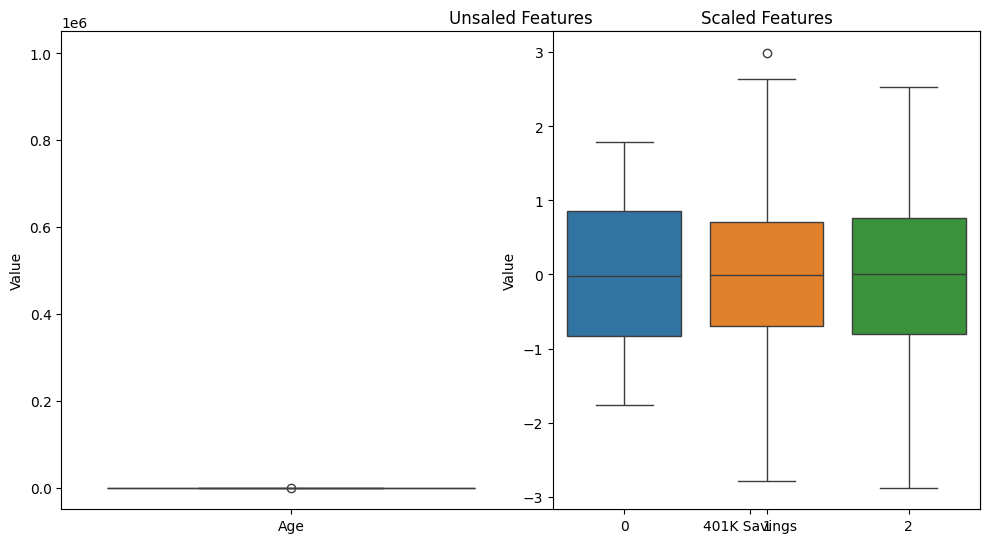

In [158]:
# Plot unscaled features
plt.figure(figsize=(10,6))
sns.boxplot(data=X_train[['Age', '401K Savings']])
plt.title('Unsaled Features')
plt.ylabel('Value')

# Plot scaled features 
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('Scaled Features')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

### Building the Classification Model

In [159]:
#Creating an instance of LogisticRegression model
log_reg = LogisticRegression()

# Fitting the model on the training data
log_reg.fit(X_train_scaled, y_train)

# Make prediction on the test data
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Dsiplaying the first few predictions
print(y_pred_log_reg[:5])

[1 0 1 0 0]


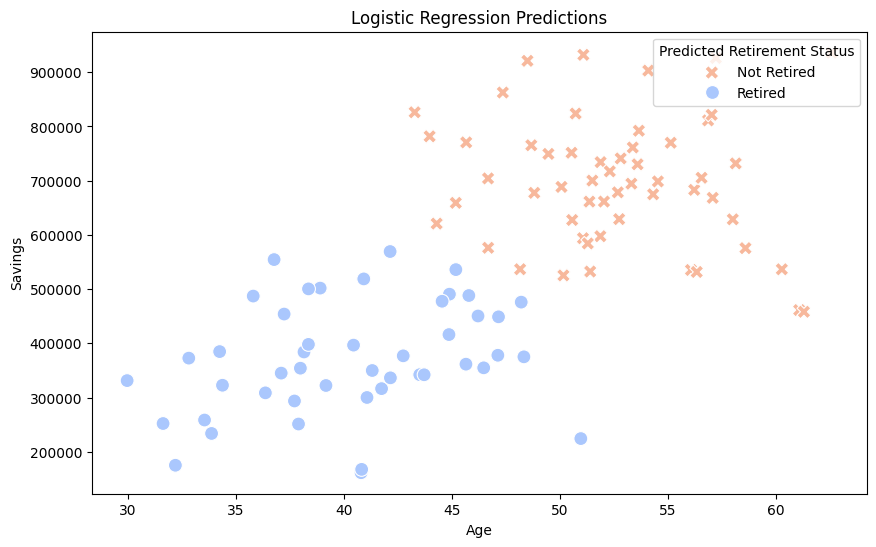

In [160]:
# Creating a DataFrame for plotting predictions
pred_df = pd.DataFrame({'Age': X_test['Age'], '401K Savings': X_test['401K Savings'], 'Predicted': y_pred_log_reg})

# Scatter plot of predicted values
plt.figure(figsize=(10,6))
sns.scatterplot(data=pred_df, x='Age', y='401K Savings', hue='Predicted', style='Predicted', palette='coolwarm', s=100)
plt.title('Logistic Regression Predictions')
plt.xlabel('Age')
plt.ylabel('Savings')
plt.legend(title='Predicted Retirement Status', loc='upper right', labels=['Not Retired', 'Retired'])
plt.show()

### Evaluating the Model

Evaluating with Classification Report and Confusion Matrix

In [161]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
print(f"Confusion Matrix:\n{conf_matrix}\n\n") # Displaying the confusion matrix

# Generating classification report
class_report = classification_report(y_test, y_pred_log_reg)
print(f"Classification Report:\n{class_report}")

Confusion Matrix:
[[44  0]
 [ 2 54]]


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.96      0.98        56

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



# b) Forecasting using Facebook Prophet

In [162]:
# Inspecting the first few rows
df_prophet.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [163]:
# Converting 'Date' to datetime
df_prophet['Date'] = pd.to_datetime(df_prophet['Date'])

In [165]:
# Renaming columns for prophet
df_prophet.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)

In [167]:
df_prophet.head()

,ds,High,Low,Open,Close,Volume,y
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [168]:
df_prophet.rename(columns={'High': 'Max_Price', 'Low': 'Min_Price', 'Open': 'Open_StockPrice', 'Close': 'Close_Stock_Price'})

,ds,Max_Price,Min_Price,Open_StockPrice,Close_Stock_Price,Volume,y
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117


### Train-Test Split

In [169]:
# Define the cutoff for training and testing
cutoff_date = '2015-11-27'

#Split the dataset into training and testing sets
train = df_prophet[df_prophet['ds'] < cutoff_date]
test = df_prophet[df_prophet['ds'] >= cutoff_date]

#Checking the shapes of the train and test sets
print(f"Train set shape: {train.shape}\n\n")
print(f"Test set shape: {test.shape}")

Train set shape: (4, 7)


Test set shape: (1821, 7)


### Model training 

In [170]:
# Create a Prophet model
model = Prophet()

In [171]:
# Fit the mmodel on training data
model.fit(train)

14:31:26 - cmdstanpy - INFO - Chain [1] start processing
14:31:38 - cmdstanpy - INFO - Chain [1] done processing


In [173]:
# Create a DataFrame for future dates
future =  model.make_future_dataframe(periods=len(test))

# make Predictions
forecast = model.predict(future)

# Display the forecats
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

             ds         yhat     yhat_lower     yhat_upper
1820 2020-11-16  2088.865279 -102356.296541  112422.062811
1821 2020-11-17  2088.865277 -102441.918822  112546.036300
1822 2020-11-18  2088.865275 -102529.254808  112673.807539
1823 2020-11-19  2088.865273 -102617.732220  112801.254864
1824 2020-11-20  2088.865271 -102708.328168  112926.969508


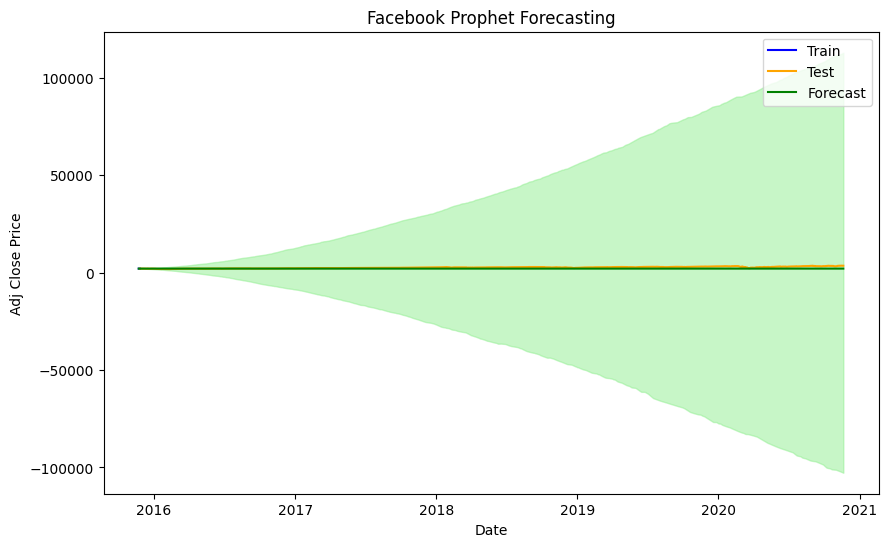

In [175]:
# Plot the predictions against the actual values 
plt.figure(figsize=(10, 6))
plt.plot(train['ds'], train['y'], label='Train', color='blue')
plt.plot(test['ds'], test['y'], label='Test', color='orange')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='green')

# Add confidence intervals
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightgreen', alpha=0.5)

plt.title('Facebook Prophet Forecasting')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

C:\Users\Luzuko\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Luzuko\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


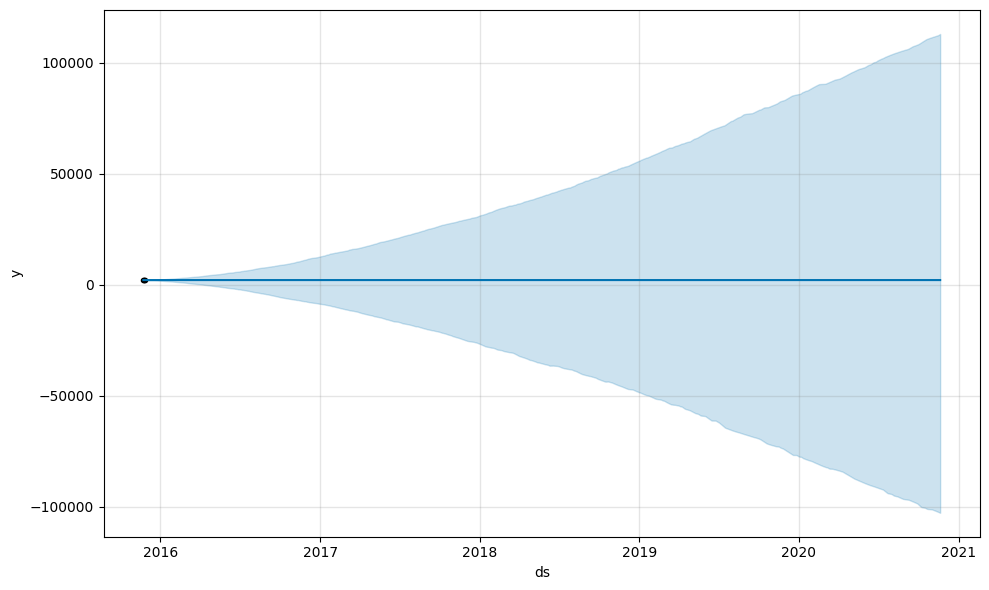

In [181]:
# Plot the forecast
fig = model.plot(forecast)
plt.show()

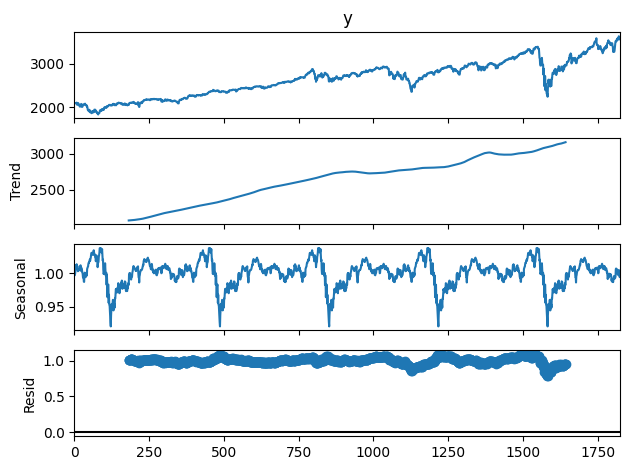

In [182]:
result = seasonal_decompose(df_prophet['y'], model='multiplicative', period=365)

# Plot the decomposed components
result.plot()
plt.show()

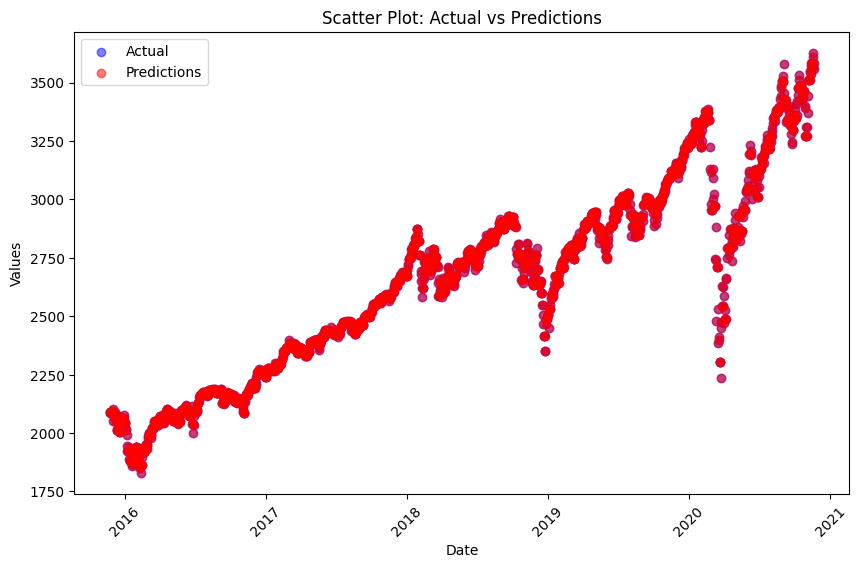

In [183]:
# Scatter Plot: Comparing actual vs predicted
plt.figure(figsize=(10,6))
plt.scatter(df_prophet['ds'], df_prophet['y'], color='blue', label='Actual', alpha=0.5)
plt.scatter(df_prophet['ds'], df_prophet['y'], color='red', label='Predictions', alpha=0.5)
plt.title('Scatter Plot: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [184]:
# Boxplot: Distribution of actual and predicted values
plt.figure(figsize=(8,6))
sns.boxplot(data=df_prophet[['y', 'Predictions']])
plt.title('Boxplot: Actual vs Predictions')
plt.ylabel('Values')
plt.show()

KeyError: "['Predictions'] not in index"

<Figure size 800x600 with 0 Axes>

In [190]:
# Bar Graph: Actual vs Predicted values for a selected period
df_sample = df_prophet.head(10)  # Taking first 10 records for sample bar plot
df_sample.plot(kind='bar', x='ds', y=['y', 'Predictions'], figsize=(10,6), width=0.8)
plt.title('Bar Graph: Actual vs Predictions')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

KeyError: "['Predictions'] not in index"

KeyError: 'Predictions'

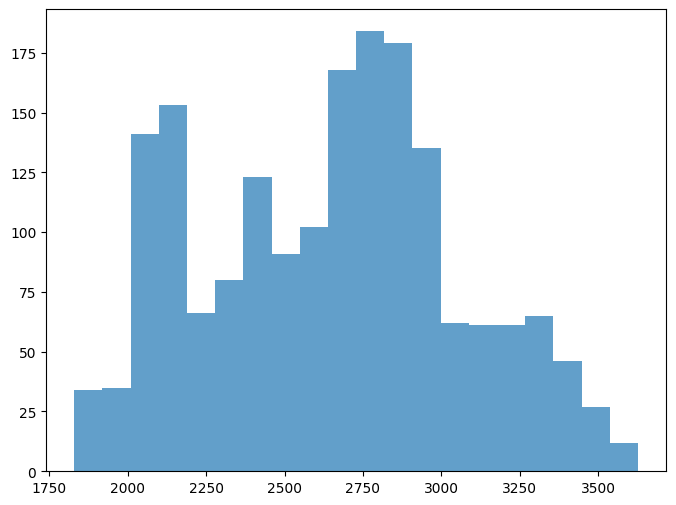

In [187]:
# Histogram: Distribution of the actual values
plt.figure(figsize=(8,6))
plt.hist(df_prophet['y'], bins=20, alpha=0.7, label='Actual')
plt.hist(df_prophet['Predictions'], bins=20, alpha=0.7, label='Predictions')
plt.title('Histogram: Distribution of Actual vs Predictions')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

KeyError: 'Predictions'

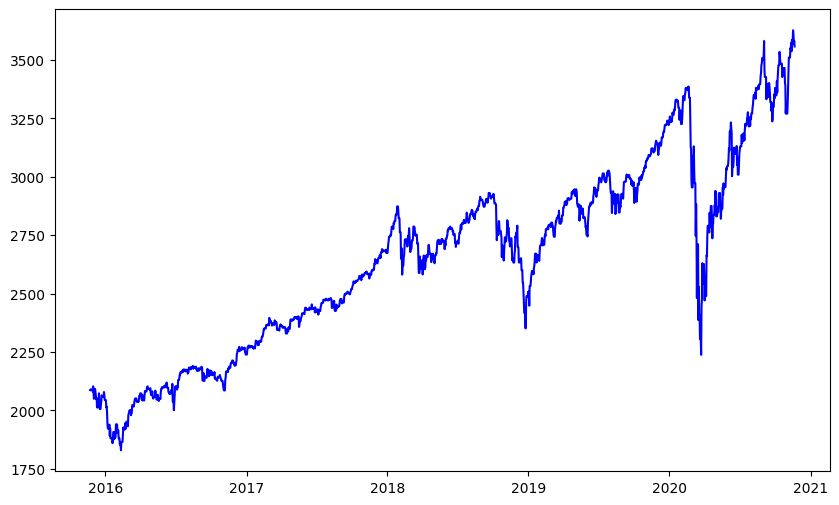

In [186]:
# Line Plot: Showing trend of actual vs predicted over time
plt.figure(figsize=(10,6))
plt.plot(df_prophet['ds'], df_prophet['y'], color='blue', label='Actual')
plt.plot(df_prophet['ds'], df_prophet['Predictions'], color='red', label='Predictions')
plt.title('Line Plot: Actual vs Predictions Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Sentiment Analysis on Employee Feedback (Two Pot System)
Sentiment analysis is a natural language processing (NLP) technique used to determine the emotional tone behind a piece of text. It helps categorize feedback into three main sentiment categories: positive, negative, and neutral. When applied to employee feedback for the Two Pot System, this process can reveal how employees feel about the system, providing valuable insights for improving operations or employee satisfaction.

Steps to Apply Sentiment Analysis:
Data Collection:

Gather employee feedback on the Two Pot System, which could be in the form of open-ended responses, surveys, or interviews.
Preprocessing the Data:

Text Cleaning: Remove unnecessary elements like punctuation, stop words (e.g., "is", "the", "and"), and convert all text to lowercase. This step helps in standardizing the data for analysis.
Tokenization: Break down the text into individual words or phrases, called tokens, which serve as input for further analysis.
Applying Sentiment Analysis:

Word Matching: Use pre-defined dictionaries (like lexicons) that associate words with sentiment scores. For example, words like "great," "efficient," or "easy" might be categorized as positive, while "frustrating," "difficult," or "inefficient" would be negative.
Machine Learning Models: Alternatively, use models trained on large datasets of text with labeled sentiment (e.g., positive or negative). The model can predict the sentiment of each piece of employee feedback based on patterns it has learned from the training data.
Categorization: Each feedback entry will be classified as either positive, negative, or neutral based on the tone of the text.
Result Interpretation:

Positive Feedback: Comments that indicate satisfaction or appreciation for the Two Pot System. For example, "The system saves time and is easy to use."
Negative Feedback: Feedback that reflects frustration or dissatisfaction. For instance, "The system is too complicated and wastes time."
Neutral Feedback: Responses that neither express strong positive nor negative feelings, such as "The system works as expected."
Actionable Insights:

By quantifying the amount of positive, negative, and neutral feedback, decision-makers can assess the overall sentiment of employees toward the system. If negative feedback is predominant, it may highlight areas where the system needs improvement. Positive feedback, on the other hand, shows aspects of the system that are working well.